In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [18]:
# from sklearn.datasets.samples_generator import make_blobs
import scipy.io
import csv
import os
import numpy as np
import random as rn
import operator

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math as m
import matplotlib.ticker as ticker

In [6]:
#Reference:
#   https://support.10xgenomics.com/single-cell/software/pipelines/latest/output/matrices
#   On how to process single cell output matrice on python

genome = "hg19"
matrices_dir = "./PCA/filtered_gene_bc_matrices"
human_matrix_dir = os.path.join(matrices_dir, genome)
mat = scipy.io.mmread(os.path.join(human_matrix_dir, "matrix.mtx"))

genes_path = os.path.join(human_matrix_dir, "genes.tsv")
gene_ids = np.array([row[0] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_names = np.array([row[1] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_ids_names = np.matrix([row for row in csv.reader(open(genes_path), delimiter="\t")])

barcodes_path = os.path.join(human_matrix_dir, "barcodes.tsv")
barcodes = np.array([row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")])

In [166]:
print mat.shape
print gene_ids.shape
print gene_names.shape
print barcodes.shape

(32738, 2700)
(32738,)
(32738,)
(2700,)


In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.random_projection import sparse_random_matrix
global_pca_components = {}
global_list_of_touples =[]

In [158]:
def plot_pca_weights(pca, component = 0):
    shape = pca.components_.shape
    components = shape[0]    
    number_of_features = shape[1]
    principal_components = {}
    for x in range(components):
        unsorted_features = {k: pca.components_[x][k] for k in range(number_of_features)}
        sorted_features = sorted(unsorted_features.items(), key=operator.itemgetter(1), reverse=True)
        principal_components.setdefault("PCA {}".format(x+1), sorted_features)

    assign_global_pca(principal_components)
    
    list_of_components = []
    for i in range(components):
        temp_dict = principal_components["PCA {}".format(i+1)]
        list_of_components.append([temp_dict[j] for j in range(10)])

    assign_global_touples(list_of_components)
    for t in range(components):
        tags = [list_of_components[t][k][0] for k in range(10)]
        weights = [list_of_components[t][k][1] for k in range(10)]
        tags = get_tags(tags)


        plt.rcdefaults()
        fig, ax = plt.subplots()

        y_pos = np.arange(len(tags))

        ax.barh(y_pos, weights, align='center',
                color='green', ecolor='black')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(tags)
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('Density')
        ax.set_title('PCA {}'.format(t+1))

        plt.show()

def assign_global_pca(dictionary):
    global global_pca_components
    global_pca_components = dictionary 

def assign_global_touples(list_of_components):
    global global_list_of_touples
    global_list_of_touples = list_of_components


In [170]:
def run_pca(matrix_data, components = 10, svd_solver='randomized'):
    X_mat = matrix_data.todense()
#     X_mat = X_mat.transpose()
    pca = PCA(copy=True, iterated_power='auto', n_components=components, random_state=None,
              svd_solver=svd_solver, tol=0.0, whiten=False)
    pca.fit(X_mat)
    plot_pca_weights(pca)


    return np.dot(X_mat, pca.components_.transpose())


def get_tags(list_of_indexes):
    tags = []
    for tag in list_of_indexes:
        tags.append(gene_names[tag])
    return tags

In [168]:

def plot_reduced_matrices(X_mat):
    samples, components = X_mat.shape
    offset = 1
    for i in range(components):
        for j in range(components):
            if j <= i : 
                continue
            else:
                fig, ax = plt.subplots()
                scale_C1 = preprocessing.scale(np.array(X_mat_red[:,i]))
                scale_C2 = preprocessing.scale(np.array(X_mat_red[:,j]))
                ax.scatter(scale_C1, scale_C2)
                ax.set_xlabel("PCA {}".format(i+1))
                ax.set_ylabel("PCA {}".format(j+1))
                ax.set_title("PCA {} vs. PCA {}".format(i+1, j+1))
                plt.show()


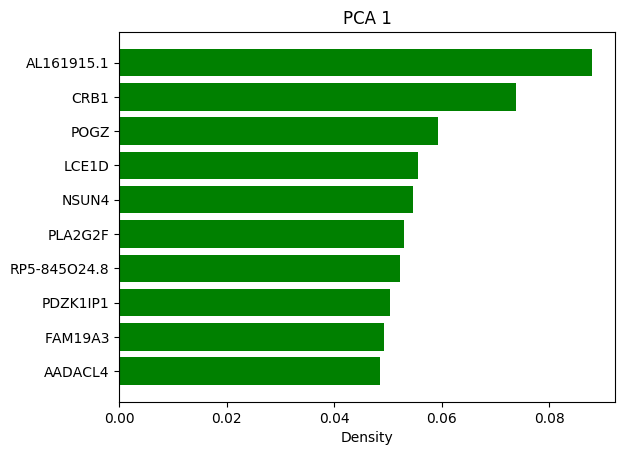

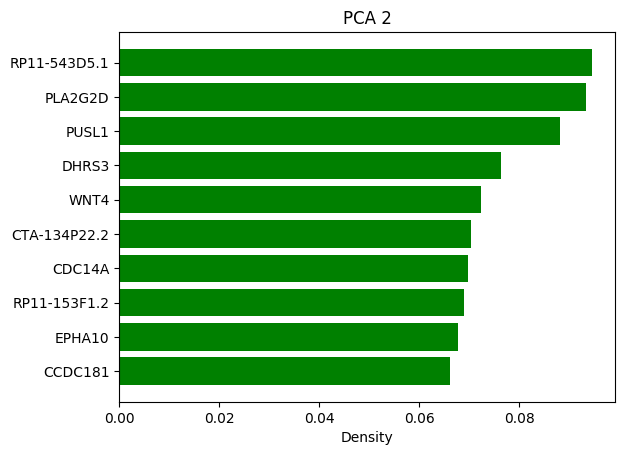

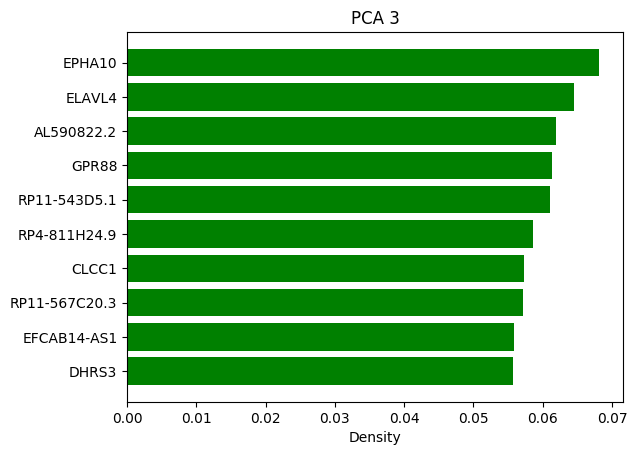

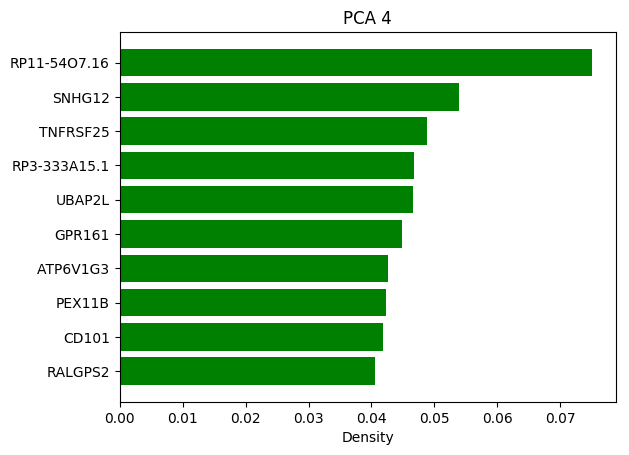

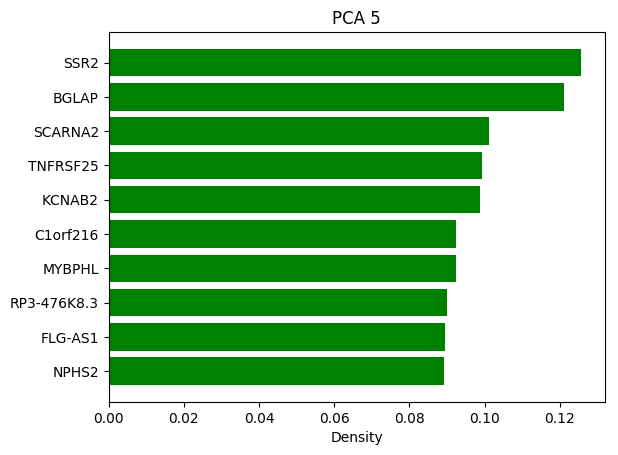

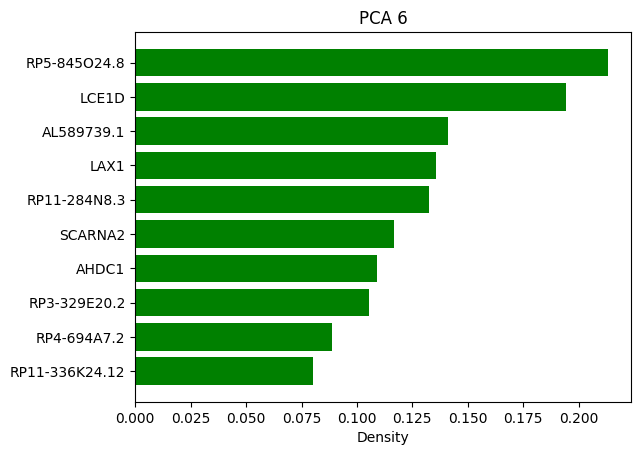

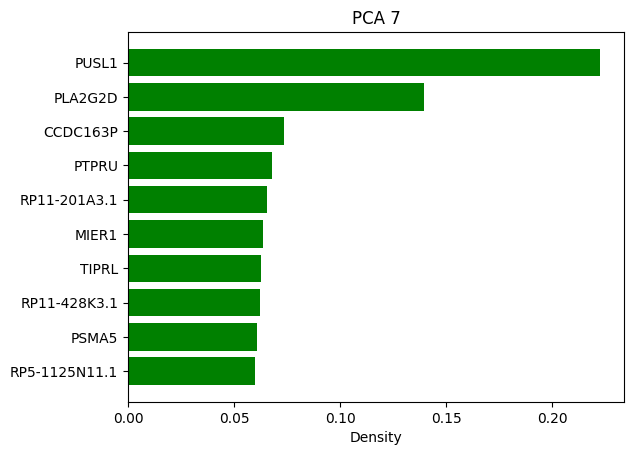

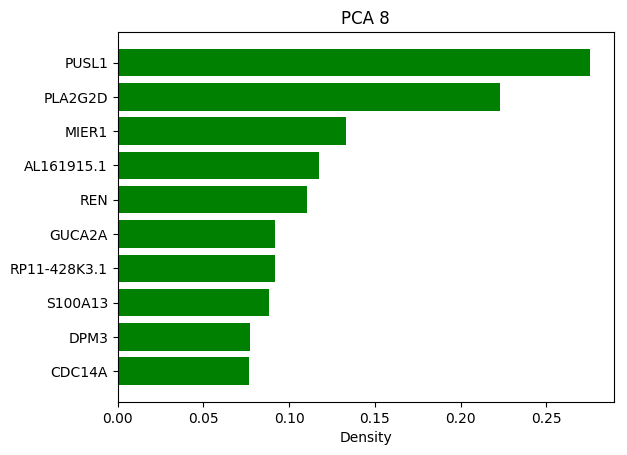

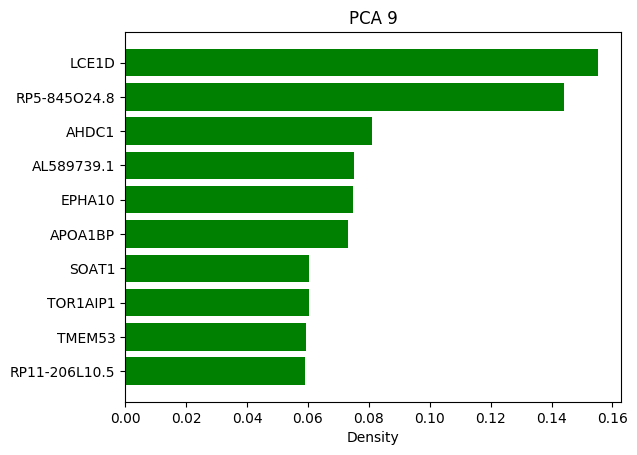

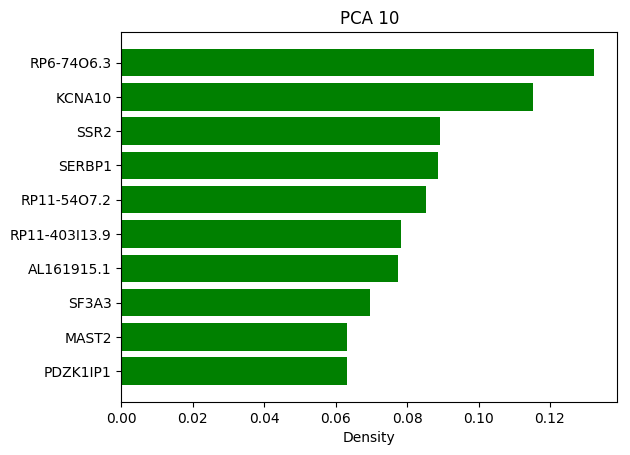

In [173]:
X_mat_red = run_pca(matrix_data = mat, components= 10)

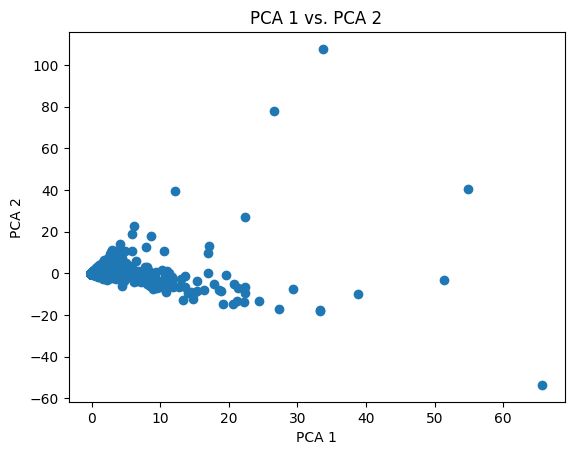

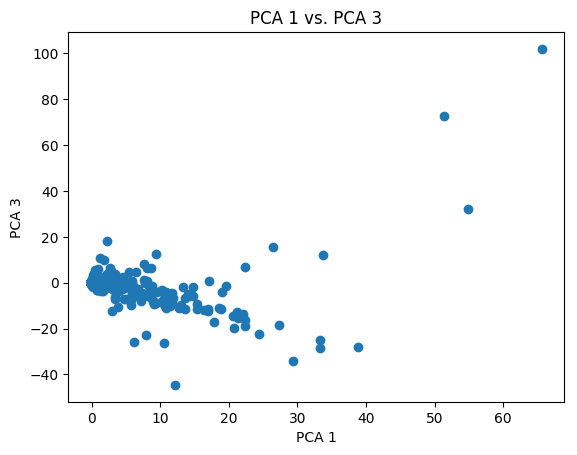

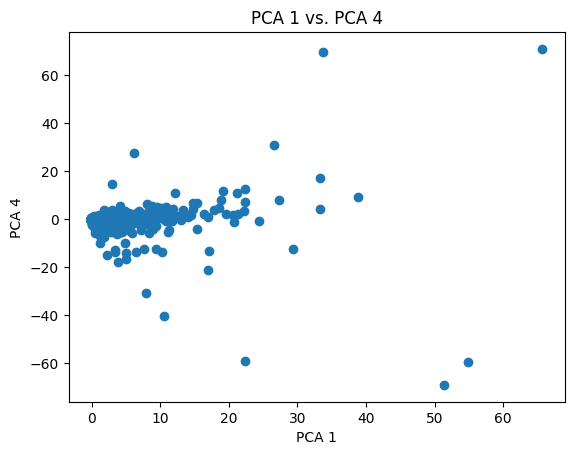

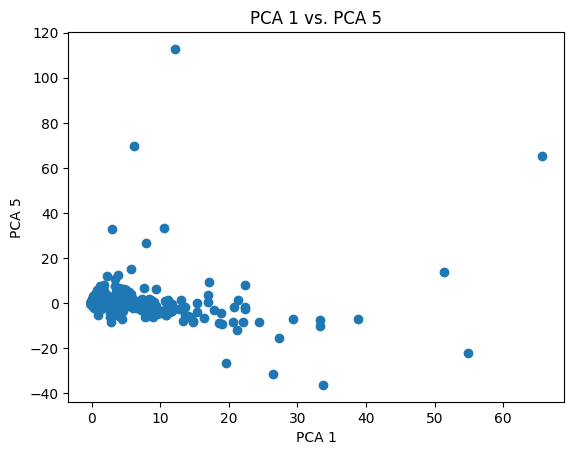

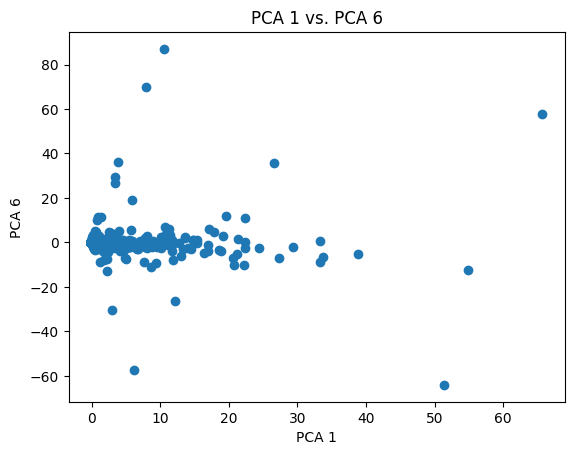

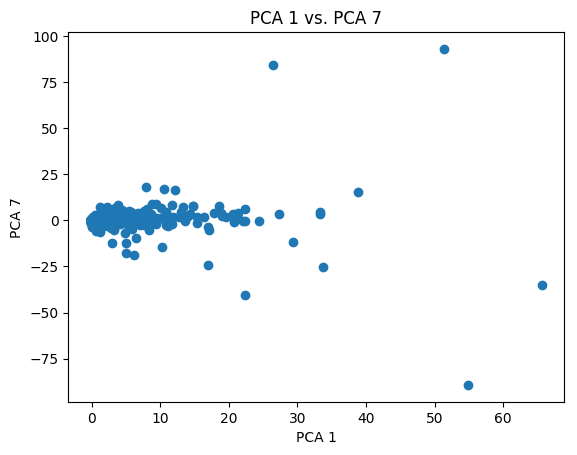

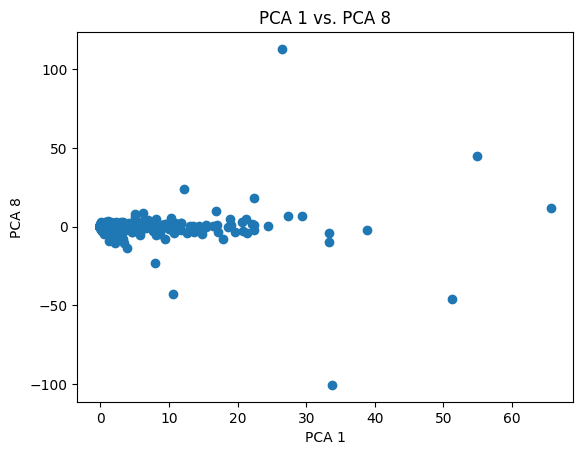

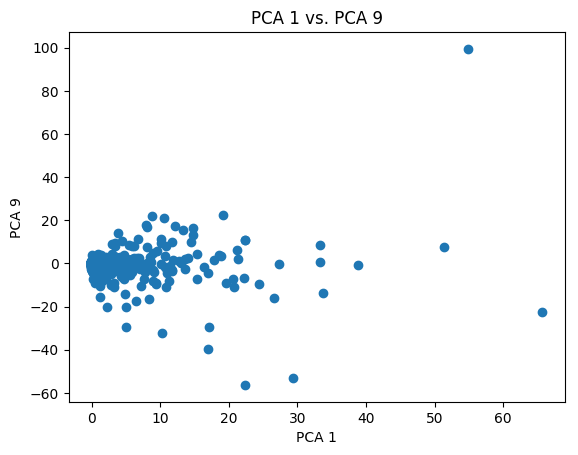

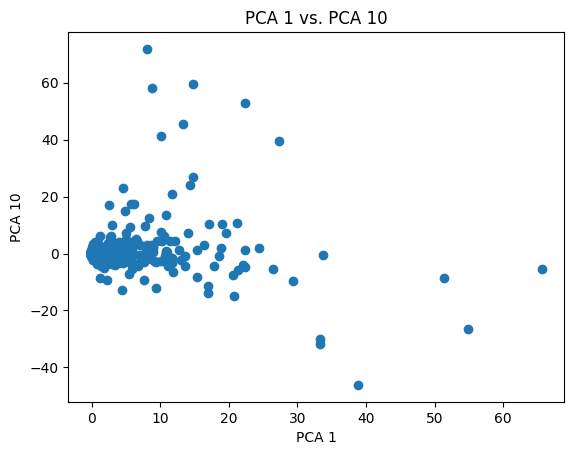

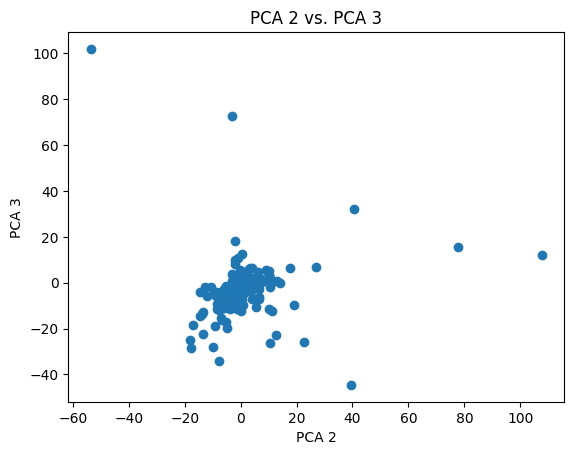

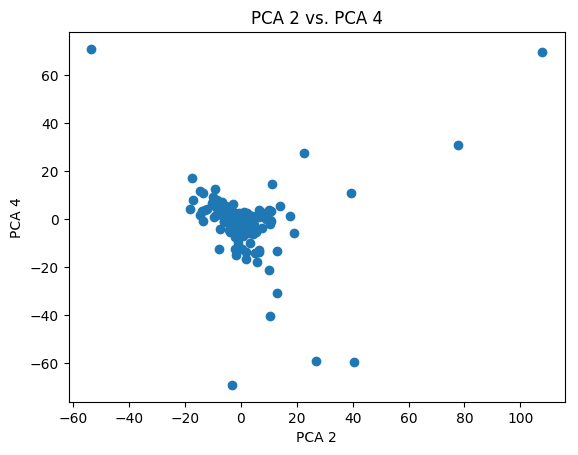

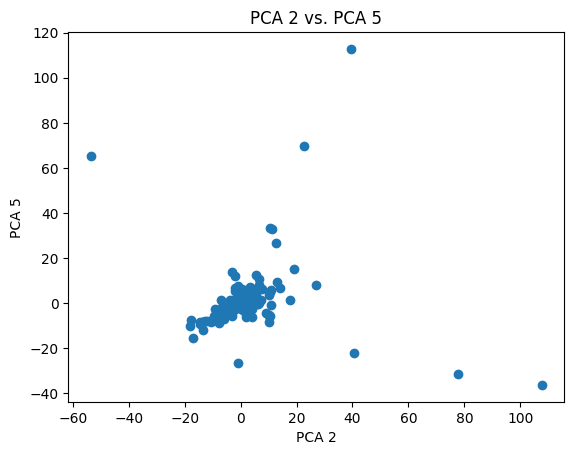

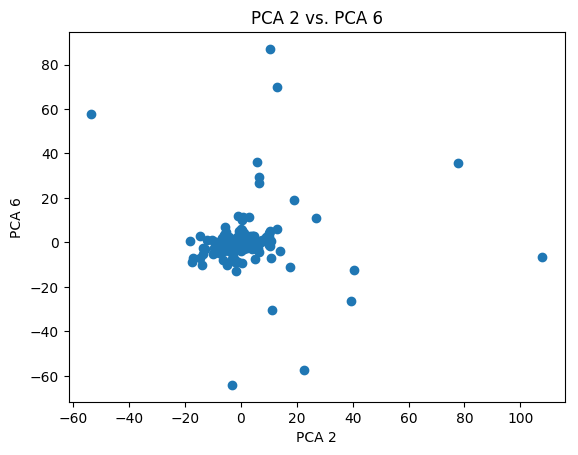

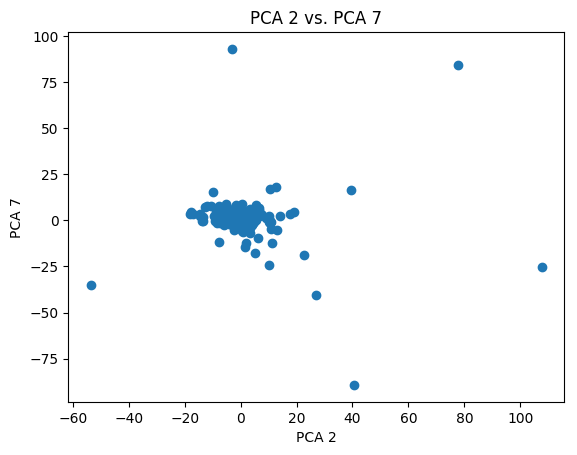

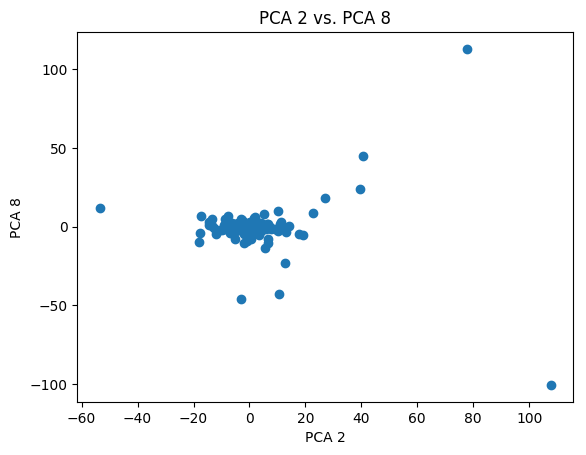

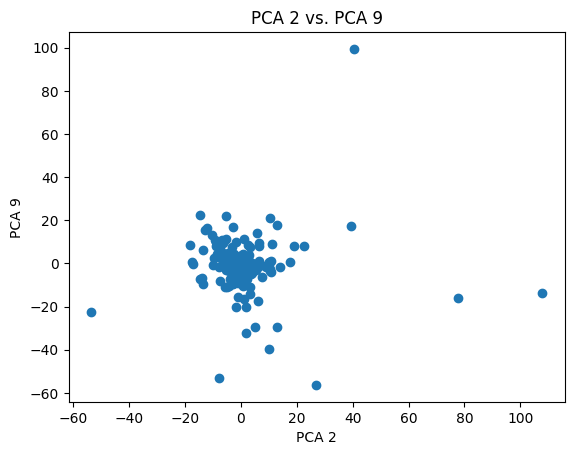

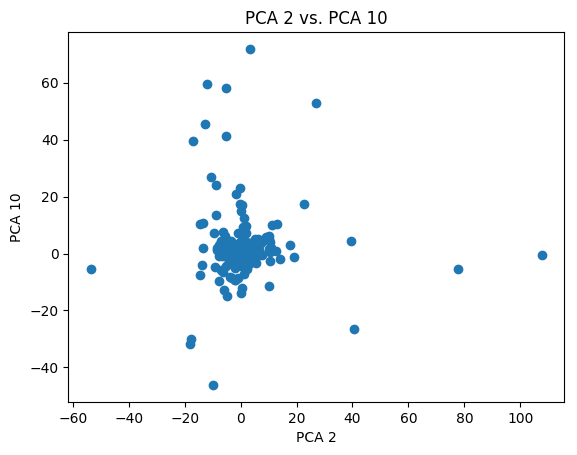

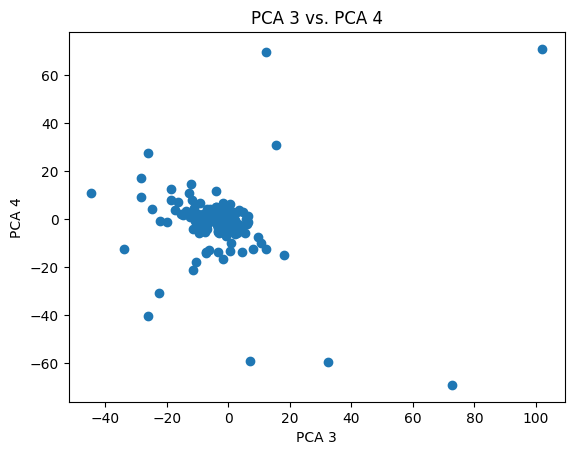

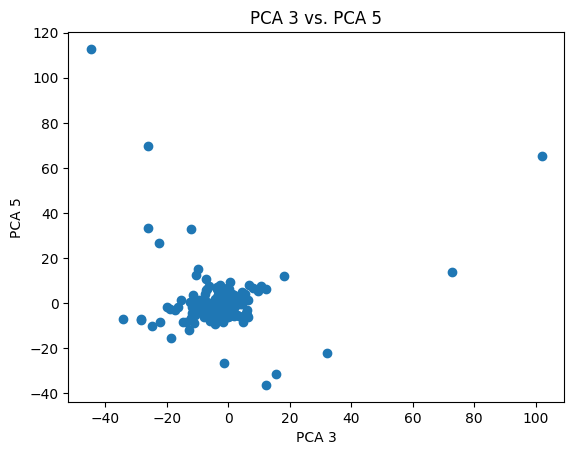

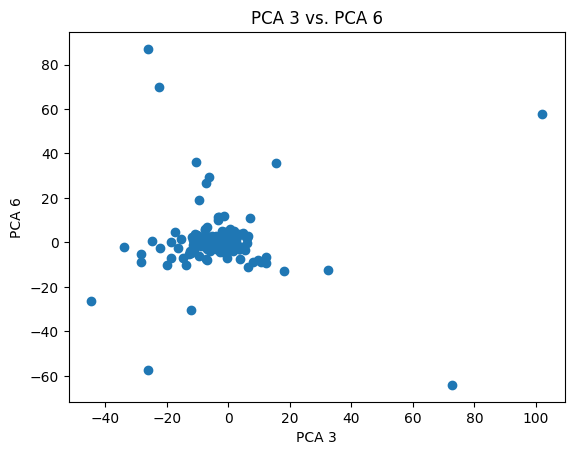

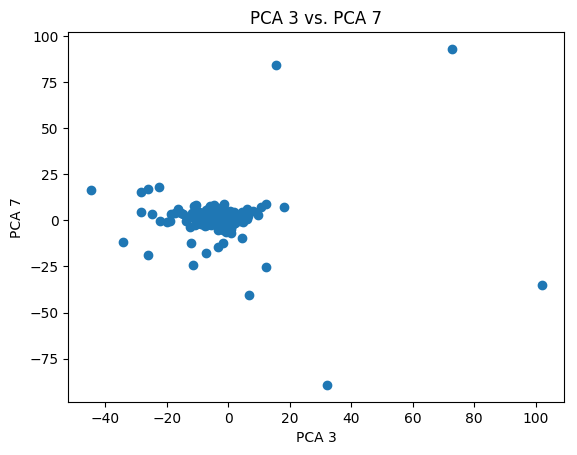

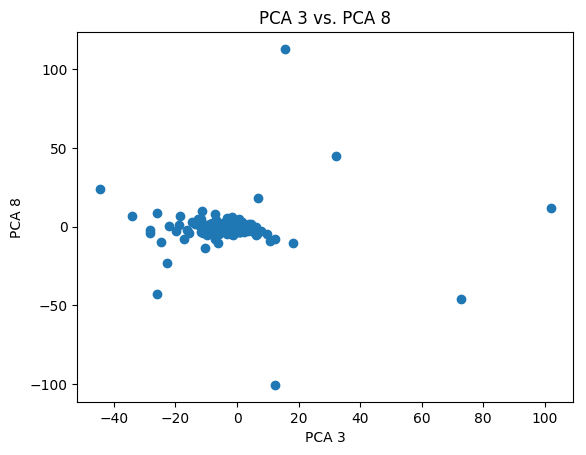

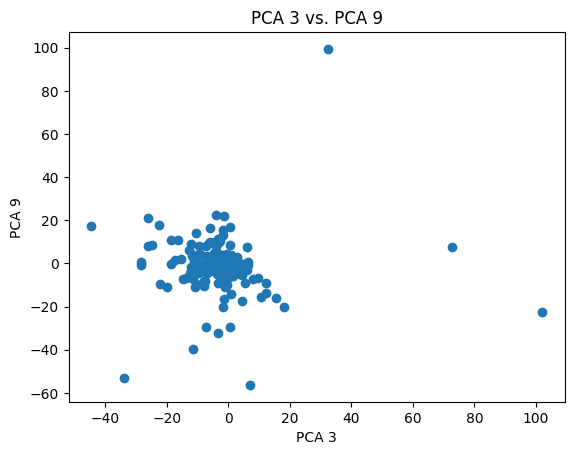

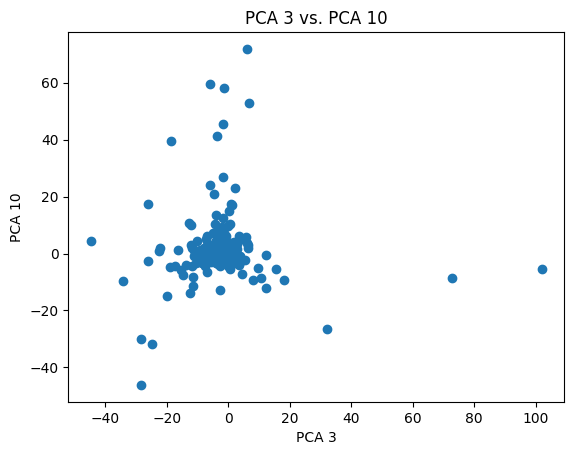

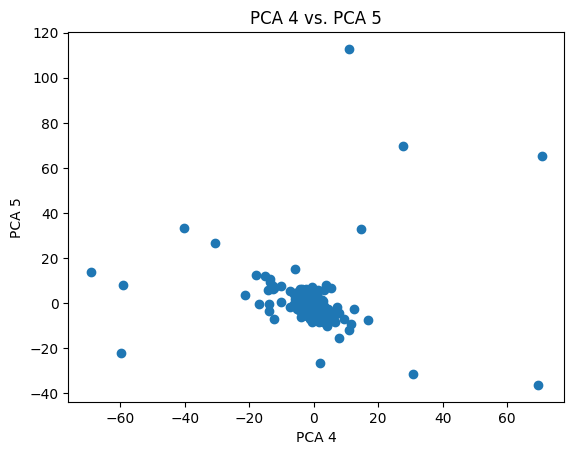

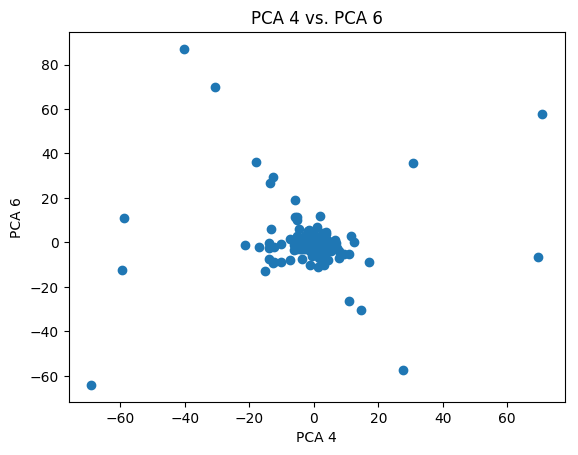

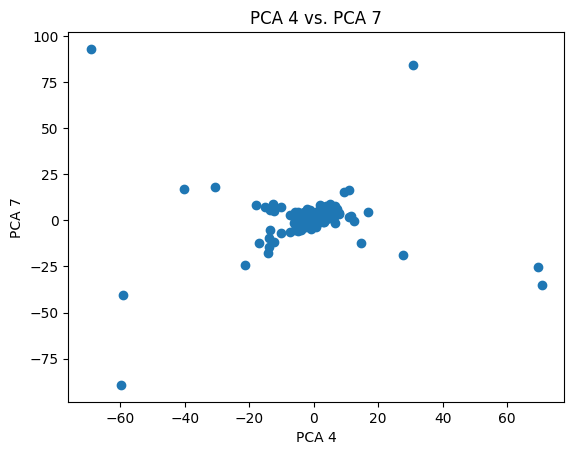

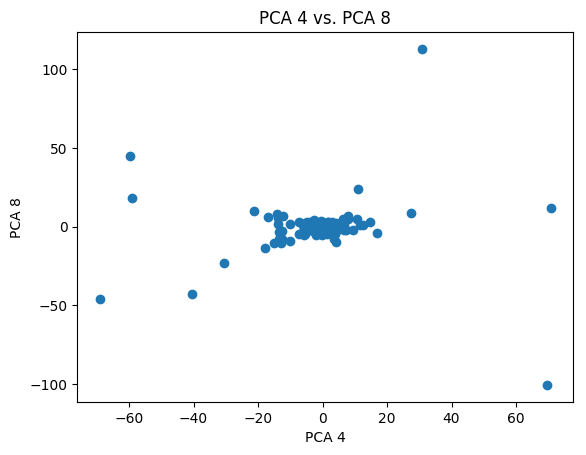

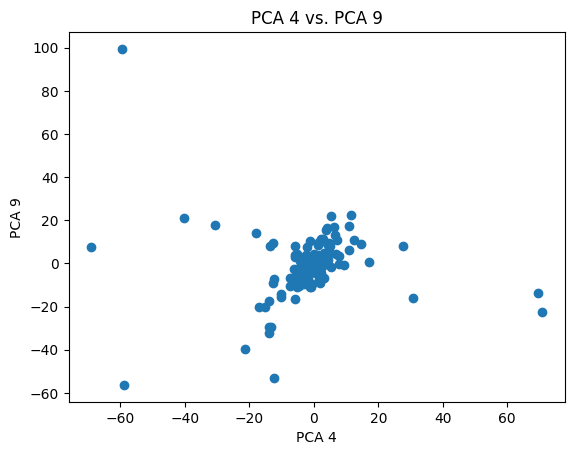

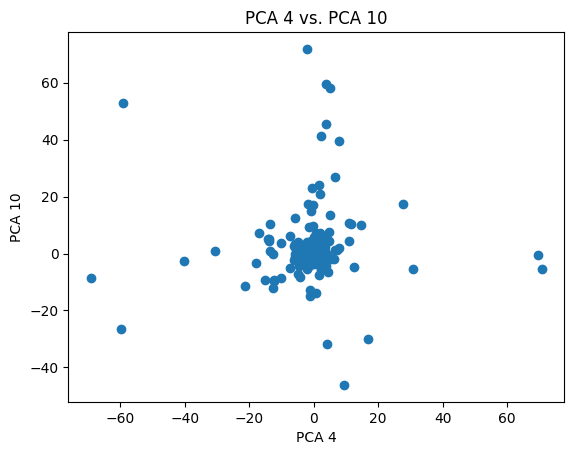

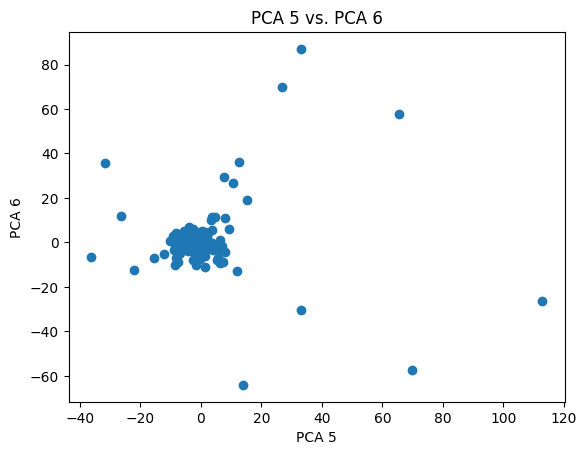

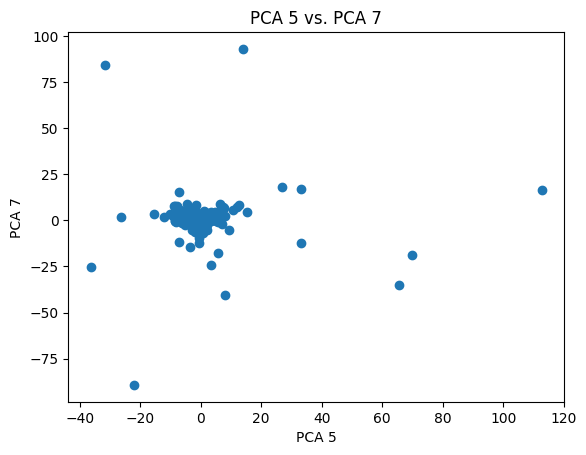

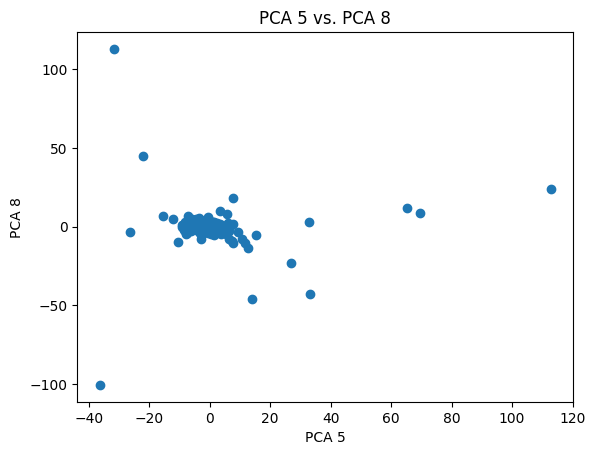

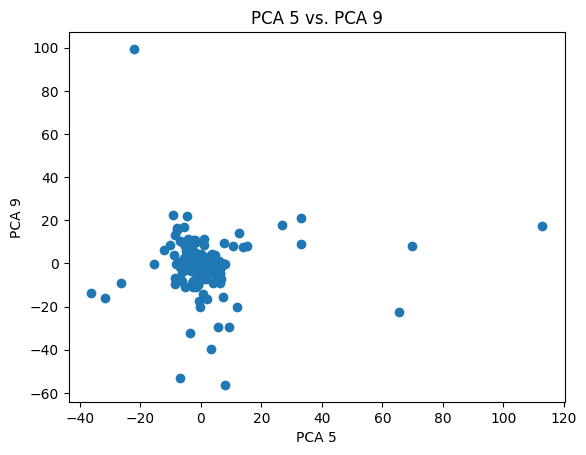

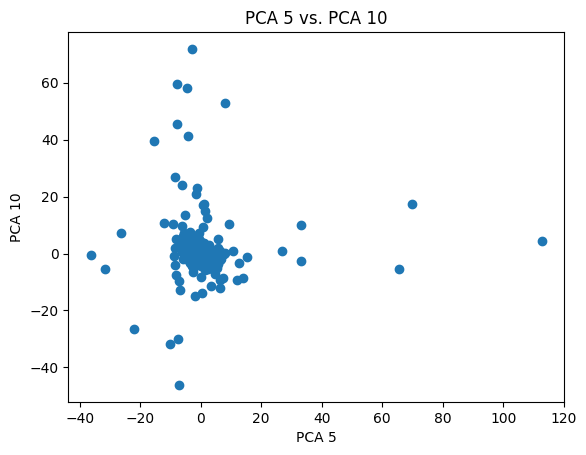

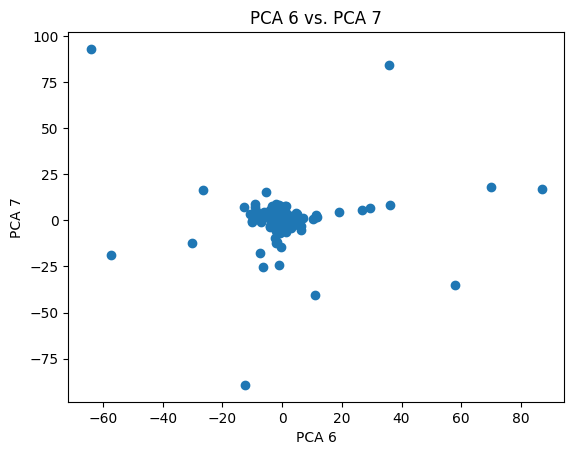

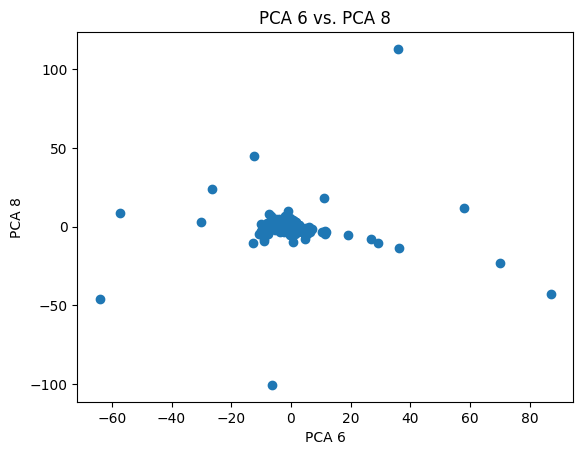

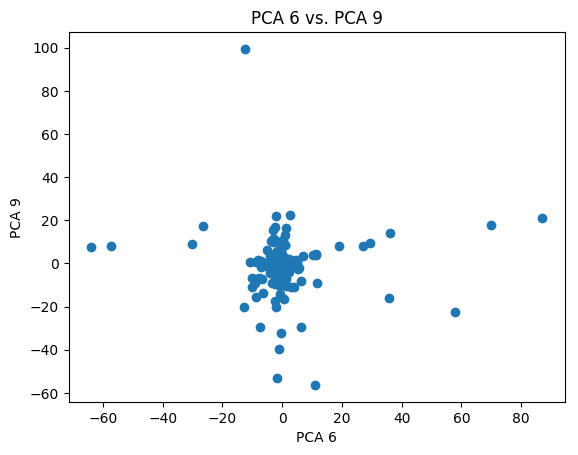

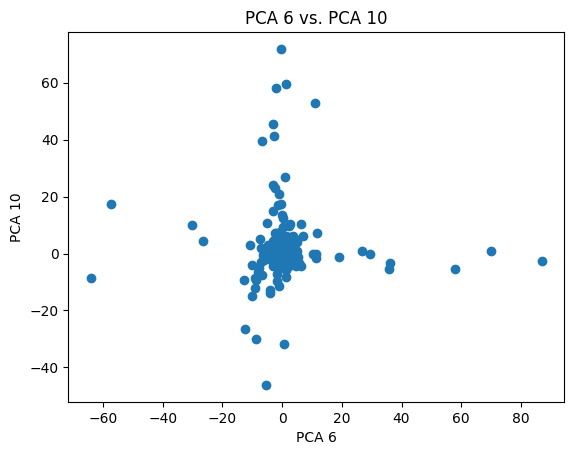

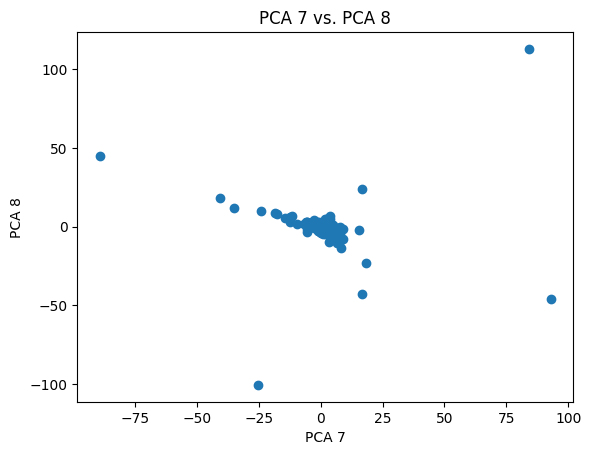

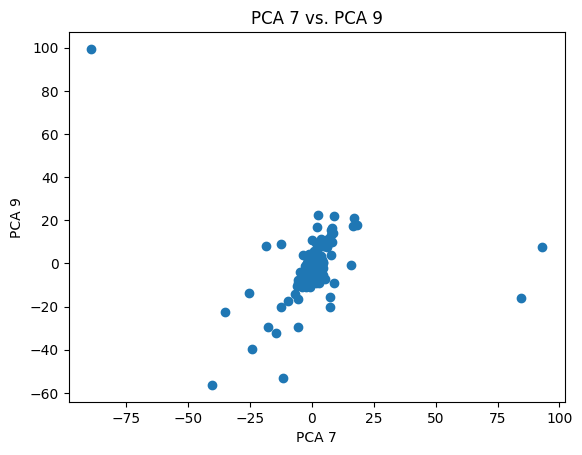

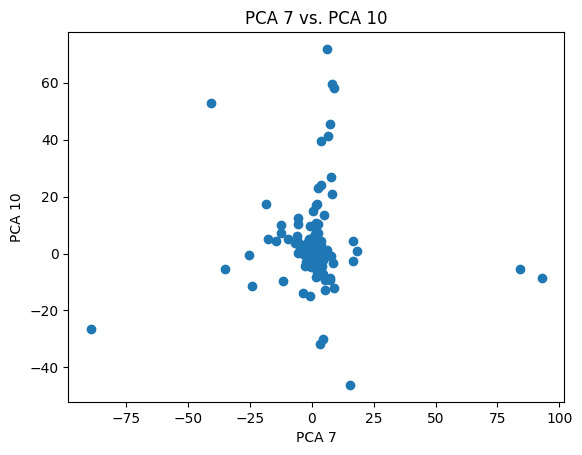

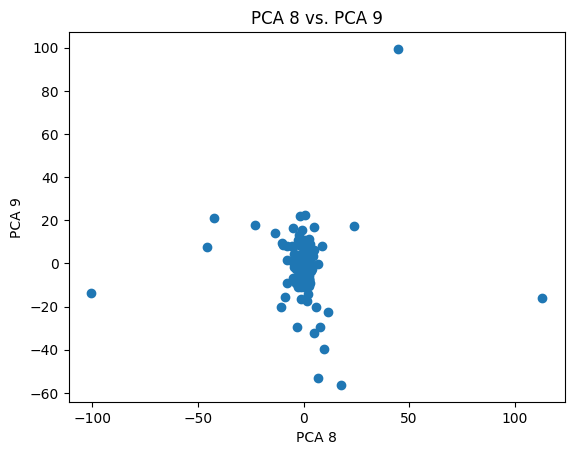

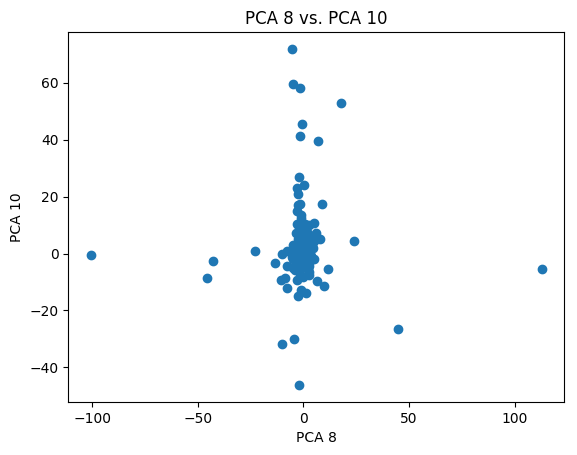

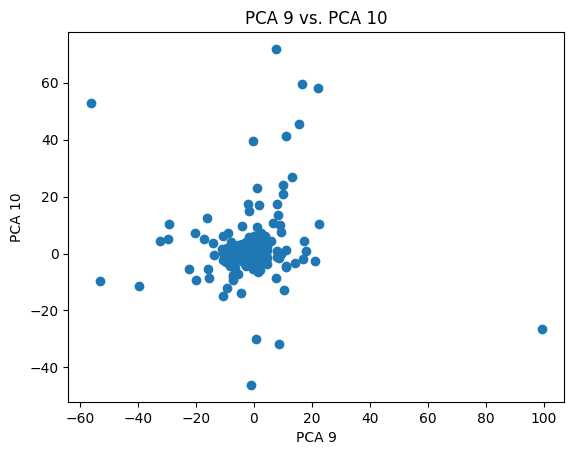

In [174]:

plot_reduced_matrices(X_mat_red)